In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/AAME.csv")

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)


In [7]:
features = ['Open', 'High', 'Low', 'Close']
data = df[features].values

In [9]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data) 

In [11]:
sequence_length = 30
X,y = [], []


In [13]:
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 3])  # Close 값

In [15]:

X, y = np.array(X), np.array(y)

In [17]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [19]:

# 7. RNN 모델 정의
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(sequence_length, len(features))),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

C:\Users\min22\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 8. 모델 훈련
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0037 - val_loss: 5.0018e-05
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.2314e-04 - val_loss: 3.1336e-05
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5424e-04 - val_loss: 2.6871e-05
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3644e-04 - val_loss: 2.7718e-05
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.5762e-04 - val_loss: 2.7389e-05
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.1764e-04 - val_loss: 2.7632e-05
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3109e-04 - val_loss: 2.4594e-05
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1407e-04 - val_loss: 2.3444e-05
Epoch 9/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2399e-04 - val_loss: 2.2729e-05
Epoch 10/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0442e-04 - val_loss: 4.3165e-05
Epoch 11/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss:

In [27]:
# 9. 성능 평가
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7274e-05
Test Loss (MSE): 4.204643119010143e-05


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


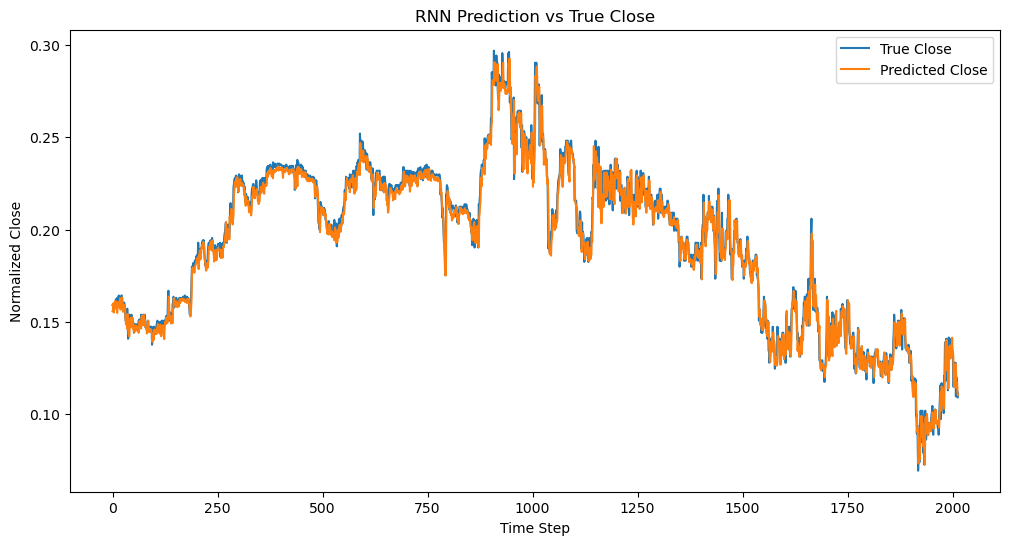

In [29]:
# 10. 예측 및 시각화
predicted = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Close')
plt.plot(predicted, label='Predicted Close')
plt.legend()
plt.title("RNN Prediction vs True Close")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close")
plt.show()